In [19]:
# Reload modules automatically
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from utils import ExperimentManager

import matplotlib.pyplot as plt
import numpy as np

gcn_exp = dict(
    label = "GCN",
    collection = "rob_csbm_gcn",
    start_id = 1,
    end_id = 240,
    n_seeds = 10,
)
lineargcn_exp = dict(
    label="LinearGCN",
    collection="rob_csbm_lineargcn",
    start_id = 1,
    end_id = 240,
    n_seeds = 10,
)
sgc_exp = dict(
    label="SGC",
    collection="rob_csbm_sgc",
    start_id = 1,
    end_id = 240,
    n_seeds = 10,
)
appnp_exp = dict(
    label = "APPNP",
    collection = "rob_csbm_appnp",
    start_id = 181,
    end_id = 360,
    n_seeds = 10,
)
appnp_exp_nettack = dict(
    label = "APPNP",
    collection = "rob_csbm_appnp",
    start_id = 421,
    end_id = 480,
    n_seeds = 10,
)
gat_exp = dict(
    label = "GAT",
    collection = "rob_csbm_gat",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
gatv2_exp = dict(
    label = "GATv2",
    collection = "rob_csbm_gatv2",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
lp_exp = dict(
    label = "LP",
    collection = "rob_csbm_lp",
    start_id = 1,
    end_id = 240,
    n_seeds = 10,
)
gcn_lp_exp = dict(
    label = "GCN+LP",
    collection = "rob_csbm_gcn_lp",
    start_id = 1,
    end_id = 240,
    n_seeds = 10,
)
sgc_lp_exp = dict(
    label="SGC+LP",
    collection="rob_csbm_sgc_lp",
    start_id = 1,
    end_id = 240,
    n_seeds = 10,
)
lineargcn_lp_exp = dict(
    label="LinearGCN+LP",
    collection="rob_csbm_lineargcn_lp",
    start_id = 1,
    end_id = 240,
    n_seeds = 10,
)
appnp_lp_exp = dict(
    label = "APPNP+LP",
    collection = "rob_csbm_appnp_lp",
    start_id = 181,
    end_id = 420,
    n_seeds = 10,
)
gat_lp_exp = dict(
    label = "GAT+LP",
    collection = "rob_csbm_gat_lp",
    start_id = 1,
    end_id = 240,
    n_seeds = 10,
)

In [32]:
#This notebook is used to analyse the over- and under-robustness of models. 
Ks = [0.1, 0.5, 1.0, 1.5, 2.0, 5.0]

experiments = [gcn_exp,
               lineargcn_exp,
               sgc_exp,
               appnp_exp,
               appnp_exp_nettack,
               gat_exp, 
               gatv2_exp,
               lp_exp, 
               gcn_lp_exp,
               appnp_lp_exp, 
               lineargcn_lp_exp,
               sgc_lp_exp,
               gat_lp_exp]
experiment_manager = ExperimentManager(experiments)

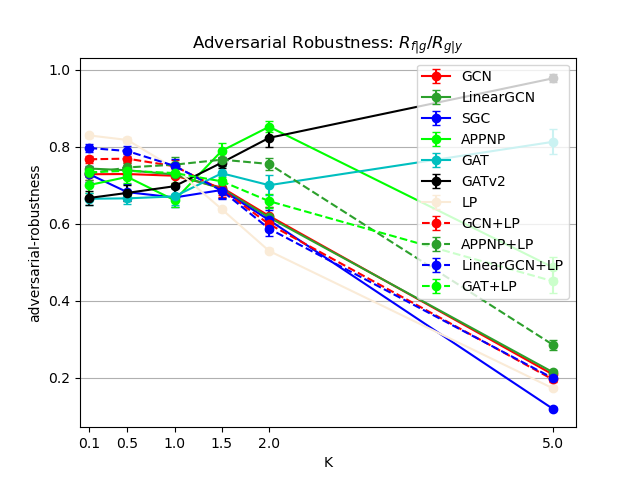

In [33]:
models = ["GCN", "LinearGCN", "GAT", "GATv2", "APPNP", "SGC", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP"]
title = "Adversarial Robustness: $R_{f|g} / R_{g|y}$"
experiment_manager.plot(name="adversarial-robustness", attack="l2", models=models, errorbars=True, title=title)

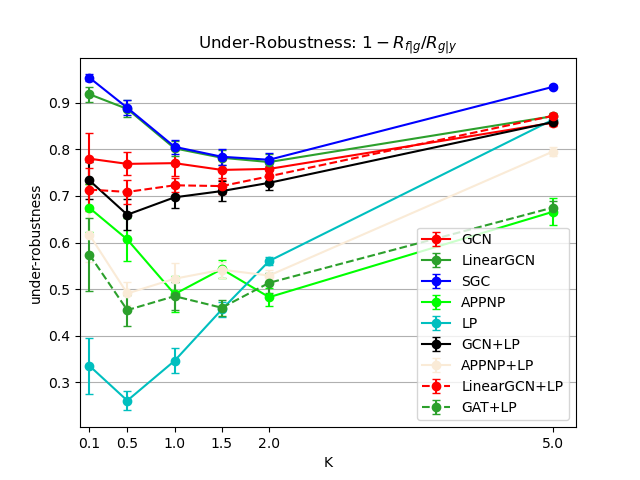

In [34]:
models = ["GCN", "LinearGCN", "APPNP", "SGC", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP"]
title = "Under-Robustness: $1-R_{f|g} / R_{g|y}$"
experiment_manager.plot(name="under-robustness", attack="nettack", models=models, errorbars=True, title=title)

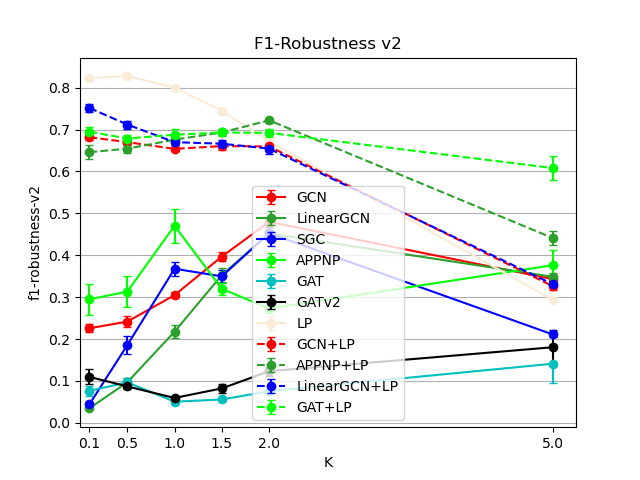

In [38]:
models = ["GCN", "LinearGCN","APPNP", "GAT", "GATv2", "SGC", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP"]
#models = ["GAT"]
title = "F1-Robustness v2"
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="l2-weak", 
                           attack_advrobustness="l2", models=models, 
                           errorbars=True, title=title)

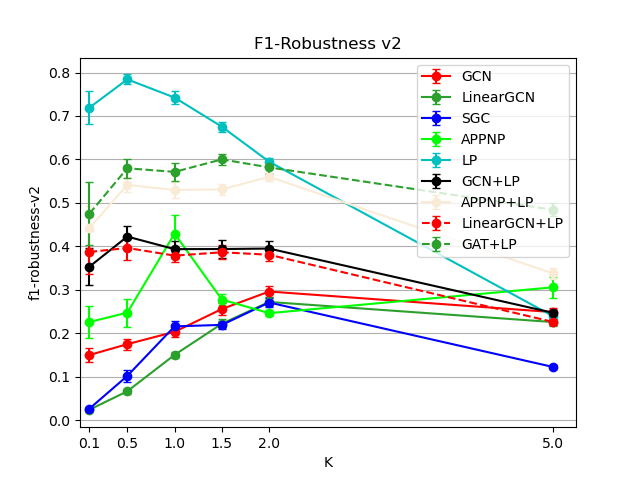

In [39]:
models = ["GCN", "LinearGCN", "APPNP","SGC", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP"]
#models = ["GAT"]
title = "F1-Robustness v2"
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="l2-weak", 
                           attack_advrobustness="nettack", models=models, 
                           errorbars=True, title=title)

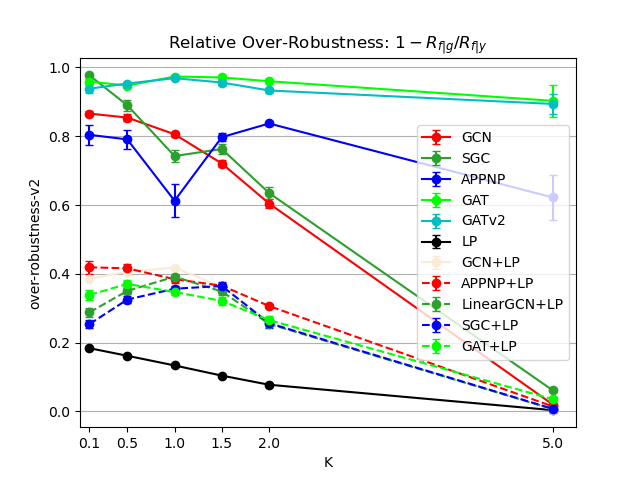

In [40]:
models = ["GCN", "APPNP", "GAT", "GATv2", "SGC", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP", "SGC+LP"]
title = "Relative Over-Robustness: $1 - R_{f|g} / R_{f|y}$"
experiment_manager.plot(name="over-robustness-v2", attack="l2-weak", models=models, errorbars=True, title=title)

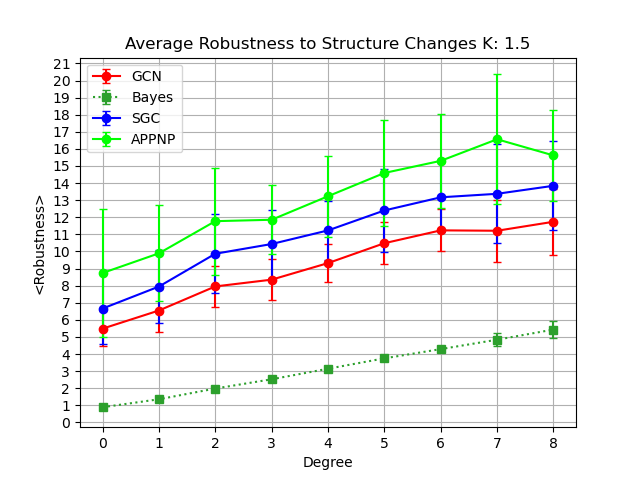

In [4]:
models = ["GCN", "LP", "GAT+LP"]
ylabel = "<Robustness>"
K = 1
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.plot_wrt_degree(name="f_wrt_y", attack="nettack", models=models, max_degree=8, K=K, errorbars=True, title=title, ylabel=ylabel)

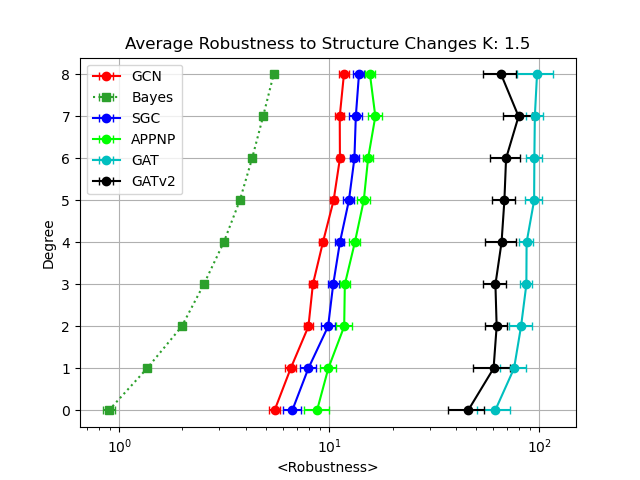

In [31]:
models = ["GCN", "SGC", "APPNP", "GAT", "GATv2"]
ylabel = "<Robustness>"
K = 1.5
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.starplot(name="f_wrt_y", attack="l2-weak", models=models, 
                            max_degree=8,
                            logplot=True, 
                            K=K, 
                            errorbars=True, 
                            title=title, 
                            ylabel=ylabel)

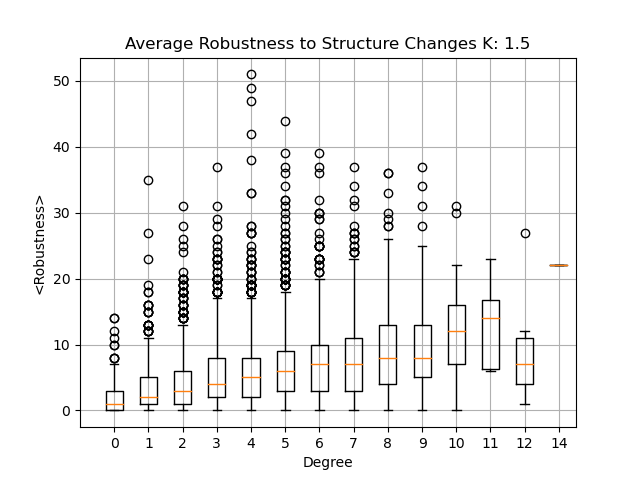

In [27]:
models = ["APPNP"]
ylabel = "<Robustness>"
K = 1.5
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.boxplot_wrt_degree_raw(name="f_wrt_y", attack="random", models=models, K=K, errorbars=True, title=title, ylabel=ylabel)

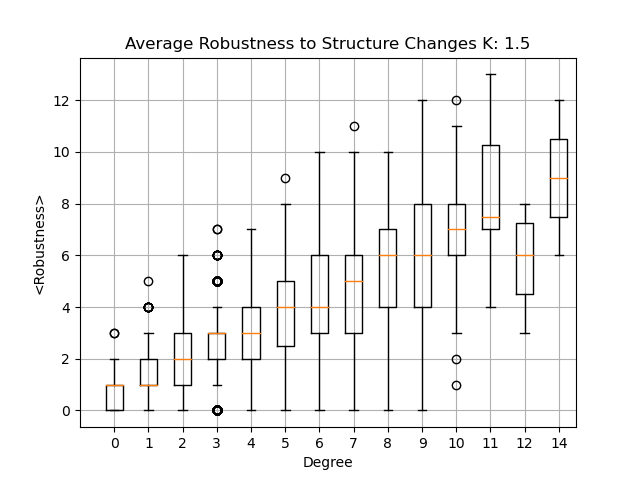

In [24]:
models = ["APPNP"]
ylabel = "<Robustness>"
K = 1.5
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.boxplot_wrt_degree_raw(name="f_wrt_y", attack="l2", models=models, K=K, errorbars=True, title=title, ylabel=ylabel)